# Opposing Momentum Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
import glob
import sys
sys.path.insert(0, '../scripts/')
from football_field import create_football_field
from plots import plot_play

%matplotlib inline
pd.options.display.max_columns = 100

%load_ext autoreload
%autoreload 2

# Read in All Momentum Data

In [2]:
df = pd.read_parquet('../working/momentum-allplays-1yarddistance.paruqet')

In [3]:
vr = pd.read_csv('../input/video_review.csv')

In [3]:
df.shape

(6260006, 40)

In [4]:
np.sum(df['punting_returning_team'] == df['punting_returning_team_partner'])

2874280

In [5]:
# 2873874 of the data points represent two players on the same team.
2873874 / 6258250

0.4592136779451125

# Filter to Opposing Teams
- Punting team is the main player
- Returning team is the partner

In [27]:
df_punting_vs_returning = df.loc[(df['punting_returning_team'] == 'Punting_Team') &
                                 (df['punting_returning_team_partner'] == 'Returning_Team')].copy()

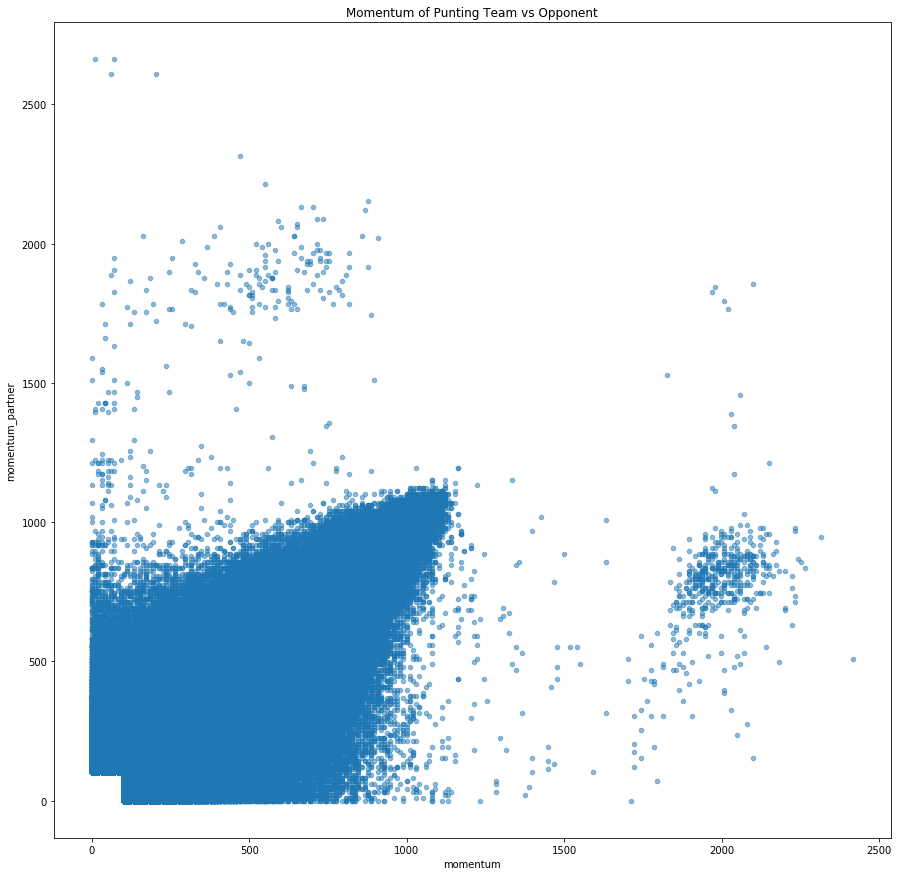

In [8]:
df_punting_vs_returning.plot(x='momentum',
                             y='momentum_partner',
                             kind='scatter',
                             figsize=(15, 15), title='Momentum of Punting Team vs Opponent',
                             alpha=0.5)

# Plot points where injuries occured

In [ ]:
df_punting_vs_returning.plot(x='momentum',
                             y='momentum_partner',
                             kind='scatter',
                             figsize=(15, 15),
                             title='Momentum of Punting Team vs Opponent')

In [13]:
df_punting_vs_returning.head()

,time,gsisid,x,y,o,dir,dis,role,mph,generalized_role,punting_returning_team,dis_meters,v_mps,dir_radians,o_radians,momentum,momentum_x,momentum_y,gsisid_partner,x_partner,y_partner,o_partner,dir_partner,dis_partner,role_partner,mph_partner,generalized_role_partner,punting_returning_team_partner,dis_meters_partner,v_mps_partner,dir_radians_partner,o_radians_partner,momentum_partner,momentum_x_partner,momentum_y_partner,distance_to_partner,opp_momentum,Season_Year,GameKey,PlayID
44,2017-10-27 00:31:03.700,23173.0,52.419998,24.389999,303.989990,324.459991,0.23,PLS,4.704546,Punting_Longsnapper,Punting_Team,0.210315,2.103146,5.662895,5.305626,234.543262,190.850157,-136.333265,31576.0,52.68,25.340000,193.639999,310.109985,0.30,PDR3,6.136364,Defensive_Lineman,Returning_Team,0.274323,2.743233,5.412440,3.379656,305.9260,197.094945,-233.974999,0.984938,97.841226,2017,506,192
48,2017-10-27 00:31:03.700,31317.0,52.320000,23.610001,342.109985,0.720000,0.13,PRG,2.659091,Punting_Lineman,Punting_Team,0.118873,1.188734,0.012566,5.970946,132.567923,132.557456,1.665854,33283.0,53.27,23.730000,192.229996,322.799988,0.27,PDL3,5.522728,Defensive_Lineman,Returning_Team,0.246891,2.468910,5.633923,3.355046,275.3334,219.311255,-166.466377,0.957550,189.194790,2017,506,192
57,2017-10-27 00:31:03.800,23173.0,52.310001,24.590000,299.299988,327.660004,0.22,PLS,4.500000,Punting_Longsnapper,Punting_Team,0.201170,2.011704,5.718746,5.223770,224.345723,189.547147,-120.012010,31576.0,52.43,25.500000,191.690002,314.410004,0.30,PDR3,6.136364,Defensive_Lineman,Returning_Team,0.274323,2.743233,5.487490,3.345622,305.9260,214.083366,-218.538394,0.917878,101.535582,2017,506,192
61,2017-10-27 00:31:03.800,31317.0,52.330002,23.740000,340.899994,10.250000,0.13,PRG,2.659091,Punting_Lineman,Punting_Team,0.118873,1.188734,0.178896,5.949827,132.567923,130.452232,23.589606,33283.0,53.16,23.980000,193.210007,323.470001,0.27,PDL3,5.522728,Defensive_Lineman,Returning_Team,0.246891,2.468910,5.645617,3.372151,275.3334,221.242864,-163.890440,0.864000,208.306761,2017,506,192
63,2017-10-27 00:31:03.800,31719.0,51.400002,21.490000,27.840000,293.709991,0.17,PRT,3.477273,Punting_Lineman,Punting_Team,0.155450,1.554499,5.126206,0.485900,173.358062,69.708568,-158.725339,28943.0,51.93,20.790001,205.649994,287.570007,0.33,PDL2,6.750000,Defensive_Lineman,Returning_Team,0.301756,3.017557,5.019043,3.589270,336.5186,101.585166,-320.819610,0.878007,165.198881,2017,506,192


In [29]:
df_punting_vs_returning['playplayer1'] = df_punting_vs_returning['Season_Year'].astype('str') \
    .add('-') \
    .add(df_punting_vs_returning['GameKey'].astype('str')) \
    .add('-') \
    .add(df_punting_vs_returning['PlayID'].astype('str')) \
    .add('-') \
    .add(df_punting_vs_returning['gsisid'].astype('int').astype('str'))

df_punting_vs_returning['playplayer2'] = df_punting_vs_returning['Season_Year'].astype('str') \
    .add('-') \
    .add(df_punting_vs_returning['GameKey'].astype('str')) \
    .add('-') \
    .add(df_punting_vs_returning['PlayID'].astype('str')) \
    .add('-') \
    .add(df_punting_vs_returning['gsisid_partner'].astype('int').astype('str'))

In [31]:
vr['playplayer1'] = vr['Season_Year'].astype('str') \
    .add('-') \
    .add(vr['GameKey'].astype('str')) \
    .add('-') \
    .add(vr['PlayID'].astype('str')) \
    .add('-') \
    .add(vr['GSISID'].astype('int').astype('str'))

In [45]:
vr['playplayer2'] = vr.dropna()['Season_Year'].astype('str') \
    .add('-') \
    .add(vr.dropna()['GameKey'].astype('str')) \
    .add('-') \
    .add(vr.dropna()['PlayID'].astype('str')) \
    .add('-') \
    .add(vr.dropna()['Primary_Partner_GSISID'].astype('int').astype('str'))

In [50]:
players_involved_in_injury = vr['playplayer1'].tolist() + vr['playplayer2'].dropna().tolist()

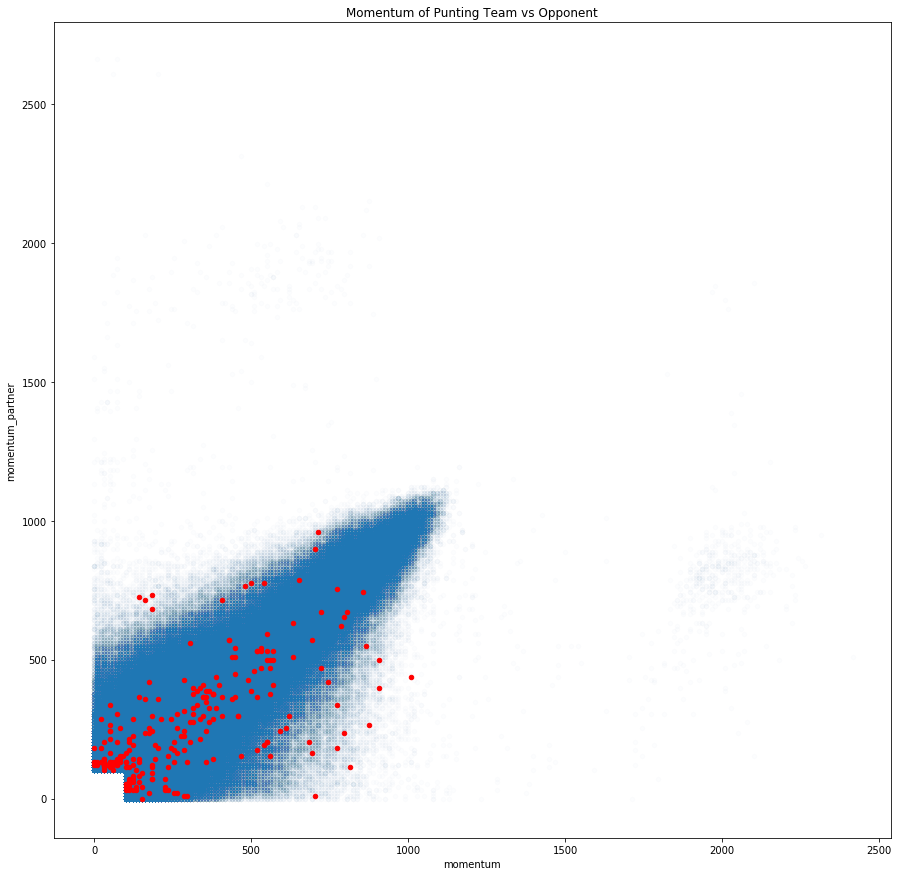

In [58]:
ax = df_punting_vs_returning.plot(x='momentum',
                             y='momentum_partner',
                             kind='scatter',
                             figsize=(15, 15), title='Momentum of Punting Team vs Opponent',
                             alpha=0.01)

df_punting_vs_returning.loc[(df_punting_vs_returning['playplayer1'].isin(players_involved_in_injury)) &
                            (df_punting_vs_returning['playplayer2'].isin(players_involved_in_injury))].plot(x='momentum',
                             y='momentum_partner',
                             kind='scatter',
                             figsize=(15, 15),
                             title='Momentum of Punting Team vs Opponent',
                           color='red',
                           ax=ax)

In [63]:
df_inj_pairs = df_punting_vs_returning.loc[(df_punting_vs_returning['playplayer1'].isin(players_involved_in_injury)) &
                            (df_punting_vs_returning['playplayer2'].isin(players_involved_in_injury))]

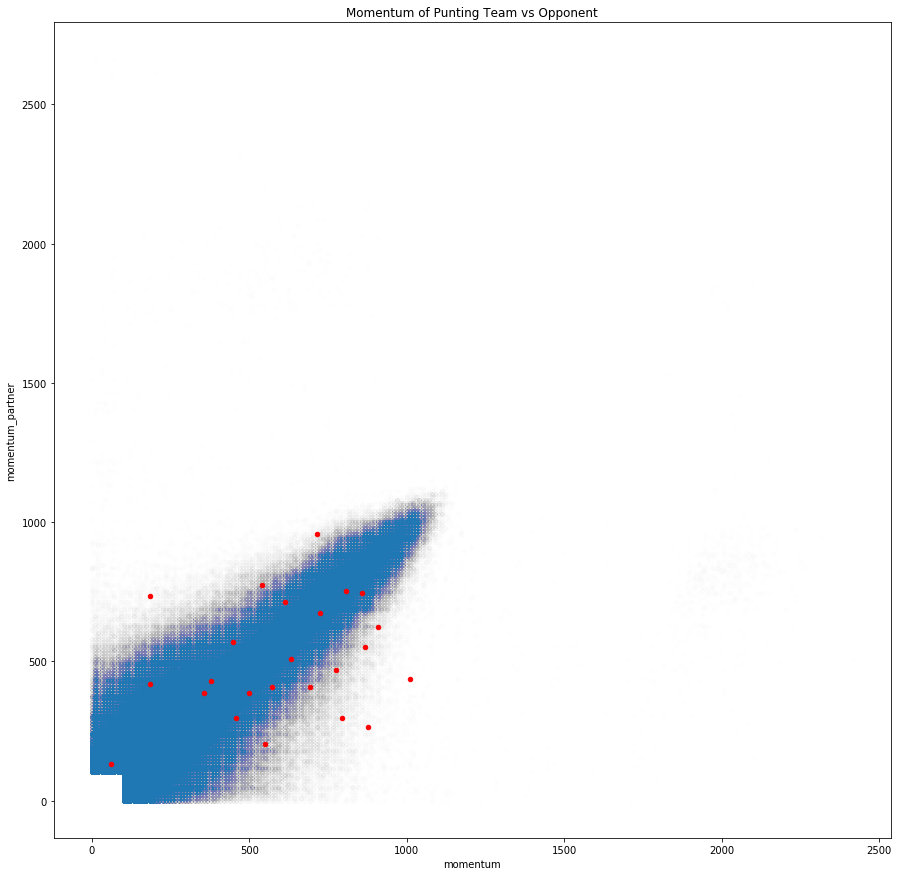

In [73]:
ax = df_punting_vs_returning.plot(x='momentum',
                             y='momentum_partner',
                             kind='scatter',
                             figsize=(15, 15), title='Momentum of Punting Team vs Opponent',
                             alpha=0.005)

df_inj_pairs.groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner']).max()[['momentum','momentum_partner']].plot(x='momentum',
                             y='momentum_partner',
                             kind='scatter',
                             figsize=(15, 15),
                             title='Momentum of Punting Team vs Opponent',
                           color='red',
                           ax=ax)

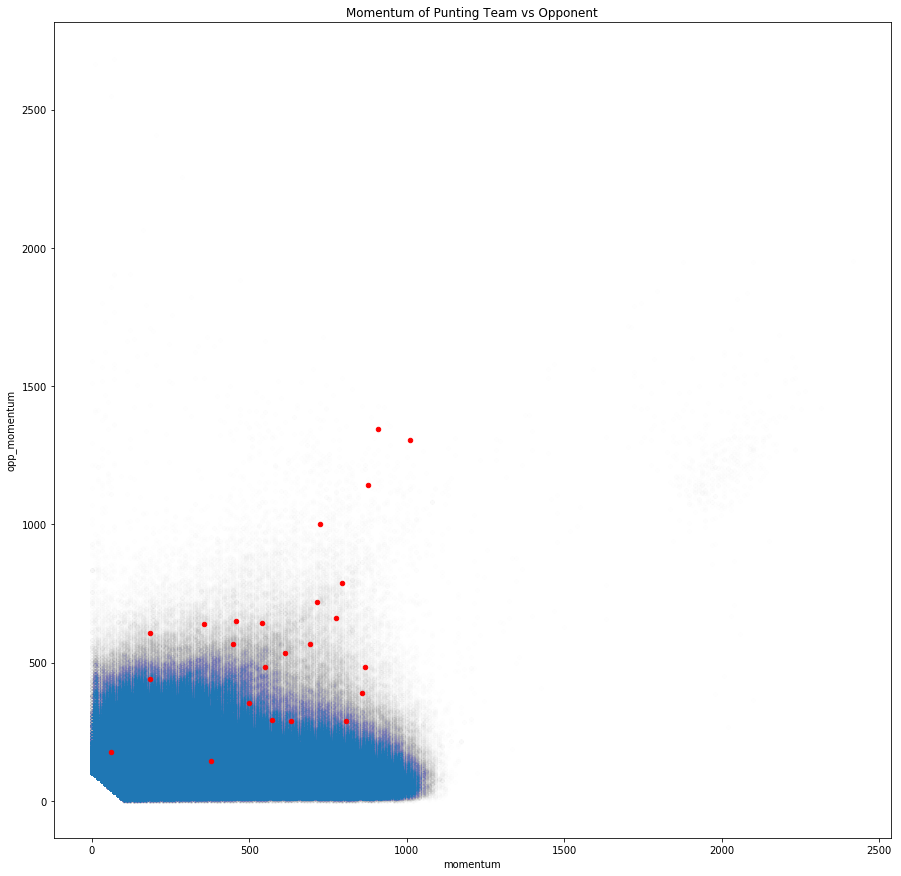

In [76]:
ax = df.plot(x='momentum',
                             y='opp_momentum',
                             kind='scatter',
                             figsize=(15, 15), title='Momentum of Punting Team vs Opponent',
                             alpha=0.005)

df_inj_pairs.groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner']).max()[['momentum','opp_momentum']].plot(x='momentum',
                             y='opp_momentum',
                             kind='scatter',
                             figsize=(15, 15),
                             title='Momentum of Punting Team vs Opponent',
                             color='red',
                             ax=ax)

# Momentum vs Opposing Momentum!

In [7]:
df['playplayer1'] = df['Season_Year'].astype('str') \
    .add('-') \
    .add(df['GameKey'].astype('str')) \
    .add('-') \
    .add(df['PlayID'].astype('str')) \
    .add('-') \
    .add(df['gsisid'].astype('int').astype('str'))

df['playplayer2'] = df['Season_Year'].astype('str') \
    .add('-') \
    .add(df['GameKey'].astype('str')) \
    .add('-') \
    .add(df['PlayID'].astype('str')) \
    .add('-') \
    .add(df['gsisid_partner'].astype('int').astype('str'))

vr['playplayer1'] = vr['Season_Year'].astype('str') \
    .add('-') \
    .add(vr['GameKey'].astype('str')) \
    .add('-') \
    .add(vr['PlayID'].astype('str')) \
    .add('-') \
    .add(vr['GSISID'].astype('int').astype('str'))

vr['playplayer2'] = vr.dropna()['Season_Year'].astype('str') \
    .add('-') \
    .add(vr.dropna()['GameKey'].astype('str')) \
    .add('-') \
    .add(vr.dropna()['PlayID'].astype('str')) \
    .add('-') \
    .add(vr.dropna()['Primary_Partner_GSISID'].astype('int').astype('str'))

players_involved_in_injury = vr['playplayer1'].tolist() + vr['playplayer2'].dropna().tolist()

df_inj_pairs_all = df.loc[(df['playplayer1'].isin(players_involved_in_injury)) &
                            (df['playplayer2'].isin(players_involved_in_injury))]

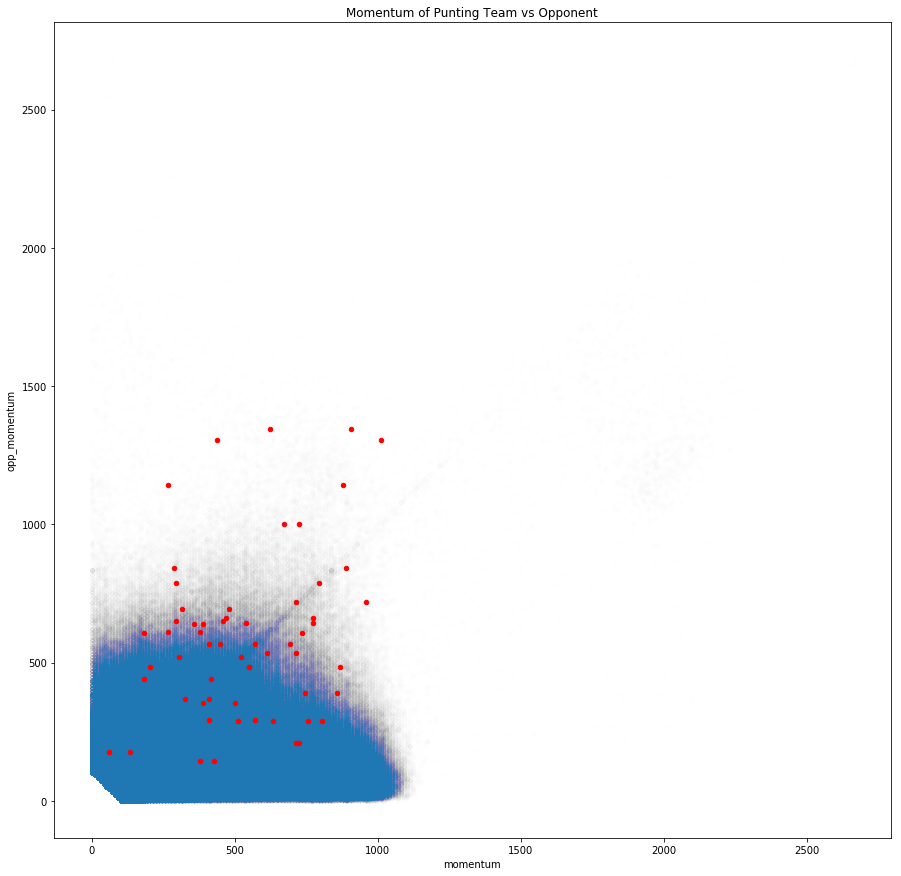

In [9]:
ax = df.plot(x='momentum',
                             y='opp_momentum',
                             kind='scatter',
                             figsize=(15, 15), title='Momentum of Punting Team vs Opponent',
                             alpha=0.005)

df_inj_pairs_all.groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner']).max()[['momentum','opp_momentum']].plot(x='momentum',
                             y='opp_momentum',
                             kind='scatter',
                             figsize=(15, 15),
                             title='Momentum of Punting Team vs Opponent',
                             color='red',
                             ax=ax)

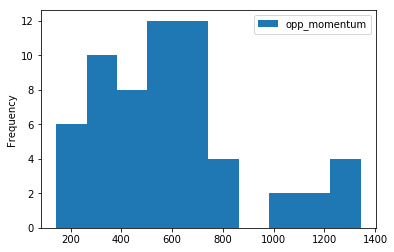

In [14]:
df_inj_pairs_all.groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner']).max()[['opp_momentum']].plot(kind='hist')

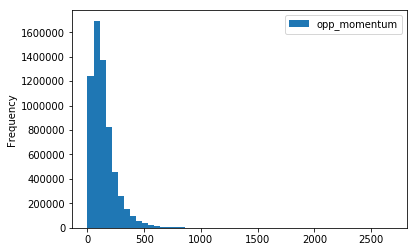

In [20]:
ax = df[['opp_momentum']].plot(kind='hist', bins=50)
#df_inj_pairs_all.groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner']).max()[['opp_momentum']].plot(kind='scatter', ax=ax, color='red')

In [33]:
df_inj_pairs_all.groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner']).max()['opp_momentum'].tolist()

[1001.4353588802265,
 1001.4353588802265,
 289.27256115805267,
 289.27256115805267,
 1306.1128006049214,
 1306.1128006049214,
 482.65719567625786,
 482.65719567625786,
 519.2246926817751,
 519.2246926817751,
 291.0806604675667,
 291.0806604675667,
 661.3034877873538,
 661.3034877873538,
 842.2015817209193,
 842.2015817209193,
 1342.950886062626,
 1342.950886062626,
 208.5960159721212,
 208.5960159721212,
 788.4228886391043,
 788.4228886391043,
 1142.1189765638956,
 1142.1189765638956,
 719.0008545638826,
 719.0008545638826,
 605.3509153585815,
 605.3509153585815,
 565.3788126472642,
 565.3788126472642,
 692.5649785967677,
 692.5649785967677,
 643.1805844271129,
 643.1805844271129,
 609.8781789793202,
 609.8781789793202,
 177.69143901614473,
 177.69143901614473,
 287.01375816778295,
 287.01375816778295,
 390.63747999674,
 390.63747999674,
 534.0343375056264,
 534.0343375056264,
 639.2865122502503,
 639.2865122502503,
 369.64297110619134,
 369.64297110619134,
 649.1378281886444,
 649.137

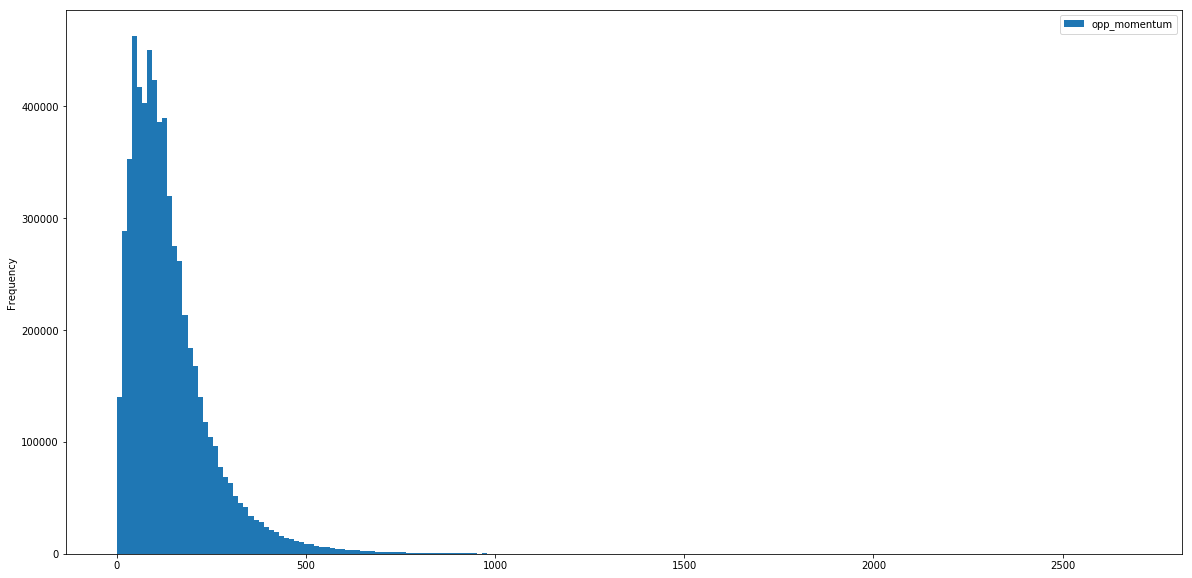

In [43]:
ax = df[['opp_momentum']].plot(kind='hist', bins=200, figsize=(20, 10))

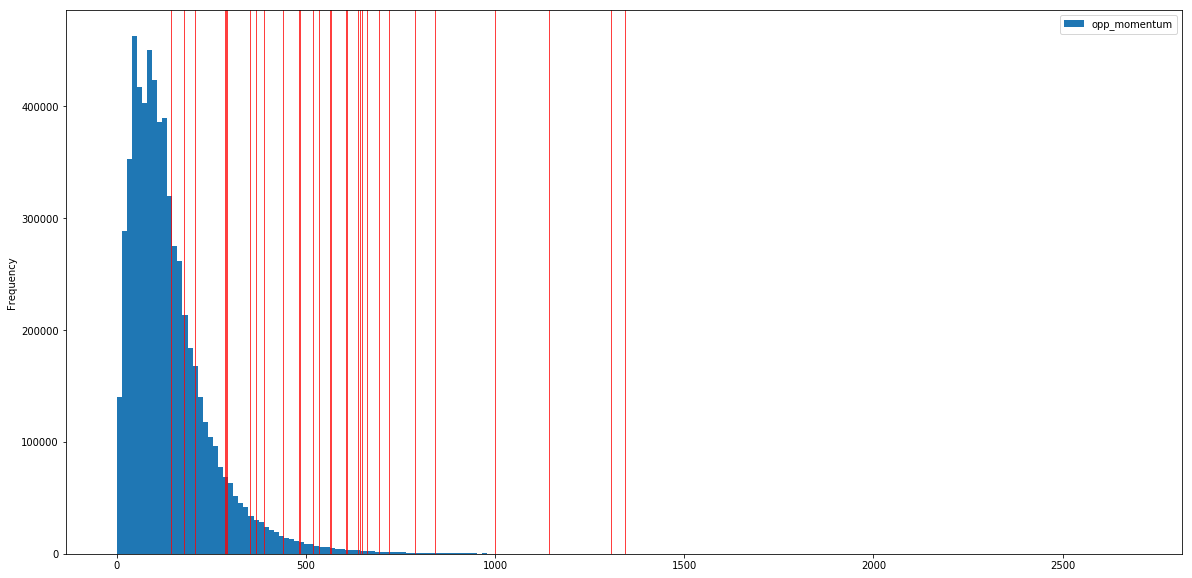

In [44]:
ax = df[['opp_momentum']].plot(kind='hist', bins=200, figsize=(20, 10))
for value in df_inj_pairs_all.groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner']).max()['opp_momentum'].tolist():
    plt.axvline(x=value, color='red', linewidth=0.5)

array([6.90918961, 6.90918961, 5.66736936, 5.66736936, 7.17481068,
       7.17481068, 6.17930666, 6.17930666, 6.25233672, 6.25233672,
       5.67360041, 5.67360041, 6.49421287, 6.49421287, 6.73601939,
       6.73601939, 7.20262463, 7.20262463, 5.34039944, 5.34039944,
       6.67003461, 6.67003461, 7.04064057, 7.04064057, 6.57786255,
       6.57786255, 6.40580832, 6.40580832, 6.33749597, 6.33749597,
       6.54040207, 6.54040207, 6.46642553, 6.46642553, 6.41325923,
       6.41325923, 5.18004856, 5.18004856, 5.65953015, 5.65953015,
       5.96777997, 5.96777997, 6.28046014, 6.28046014, 6.46035273,
       6.46035273, 5.9125376 , 5.9125376 , 6.47564506, 6.47564506,
       6.33872176, 6.33872176, 5.86767776, 5.86767776, 6.08869217,
       6.08869217, 4.96477259, 4.96477259, 6.18113953, 6.18113953])

## Log Transform

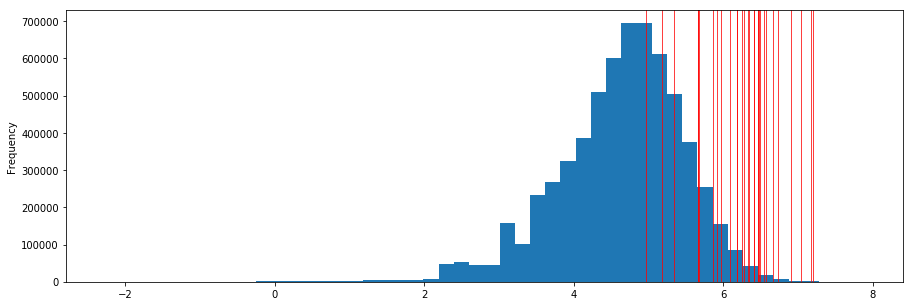

In [60]:
np.log(df.loc[df['opp_momentum'] > 0.1]['opp_momentum']).plot(kind='hist', bins=50, figsize=(15, 5))


for value in np.log(df_inj_pairs_all.groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner']).max()['opp_momentum'].tolist()):
    plt.axvline(x=value, color='red', linewidth=0.5)

# Look at the max opposing force per play!

In [84]:
every_play_opp_momentum_stats = df.groupby(['Season_Year','GameKey','PlayID'])['opp_momentum'].describe().reset_index()
every_play_opp_momentum_stats = every_play_opp_momentum_stats.merge(vr[['Season_Year','GameKey','PlayID','injury_play']], how='left')
every_play_opp_momentum_stats['injury_play'] = every_play_opp_momentum_stats['injury_play'].fillna(False)

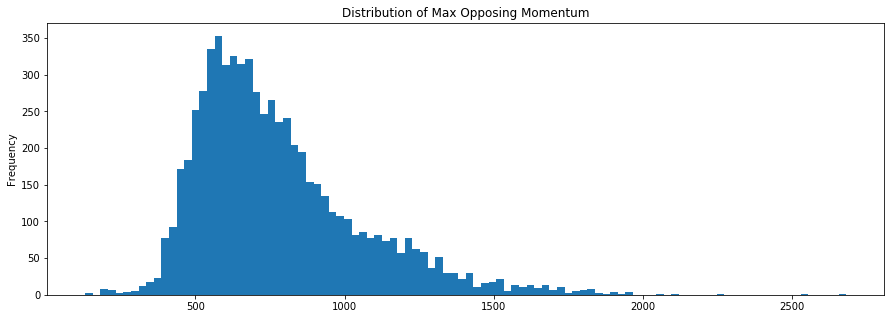

In [70]:
every_play_opp_momentum_stats['max'].plot(kind='hist', figsize=(15, 5), bins=100, title='Distribution of Max Opposing Momentum')

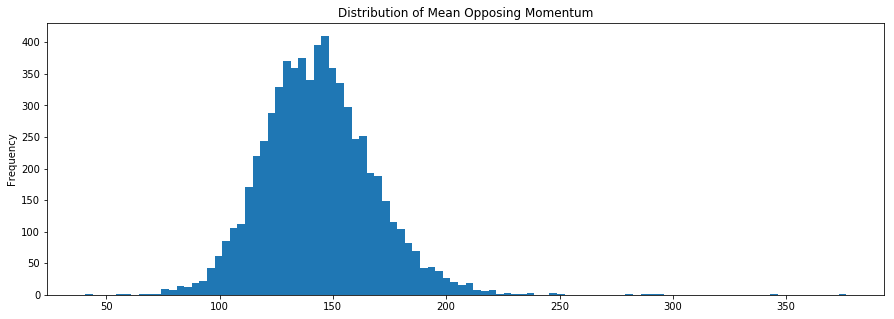

In [72]:
every_play_opp_momentum_stats['mean'].plot(kind='hist', figsize=(15, 5), bins=100, title='Distribution of Mean Opposing Momentum')

In [77]:
vr['injury_play'] = True

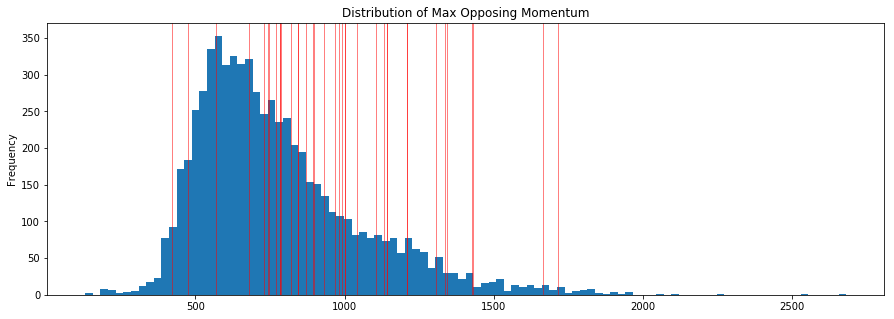

In [89]:
ax = every_play_opp_momentum_stats['max'].plot(kind='hist', figsize=(15, 5), bins=100, title='Distribution of Max Opposing Momentum')
injury_play_max = every_play_opp_momentum_stats.loc[every_play_opp_momentum_stats['injury_play']]['max'].tolist()
for value in injury_play_max:
    plt.axvline(x=value, color='red', linewidth=0.5)

# Specific Player Types
## Gunners and 

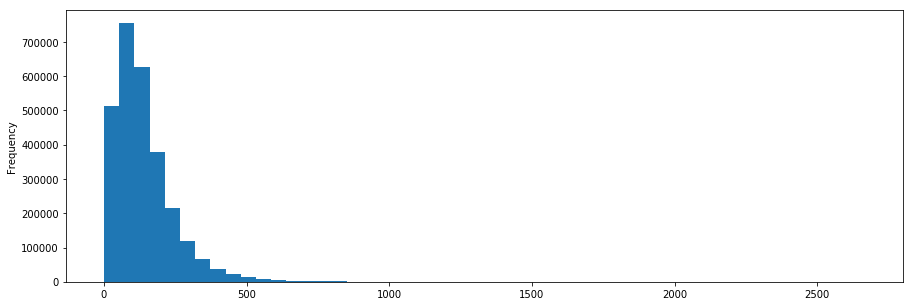

In [95]:
df.loc[(df['generalized_role'] == 'Punting_Lineman') | (df['generalized_role_partner'] == 'Punting_Lineman')]['opp_momentum'].plot(kind='hist', bins=50, figsize=(15, 5))


In [102]:
vr['injury_pair'] = True

In [104]:
df2 = pd.merge(df, vr[['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID','injury_pair']],
         left_on=['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'],
         right_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID'], how='left')
df2['injury_pair'] = df2['injury_pair'].fillna(False)

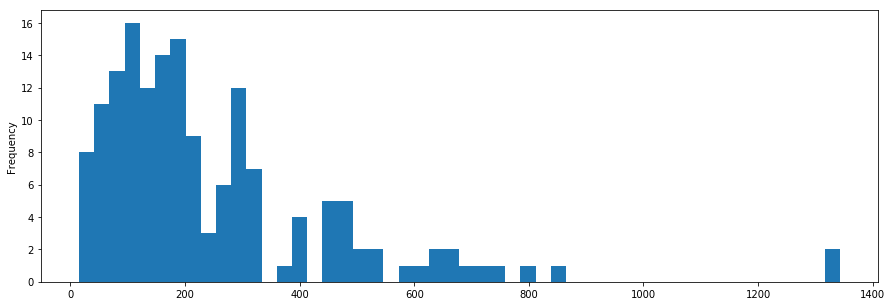

In [106]:
df2.loc[((df2['generalized_role'] == 'Punting_Lineman') | 
       (df2['generalized_role_partner'] == 'Punting_Lineman'))
      & df2['injury_pair'] == True]['opp_momentum'].plot(kind='hist', bins=50, figsize=(15, 5))


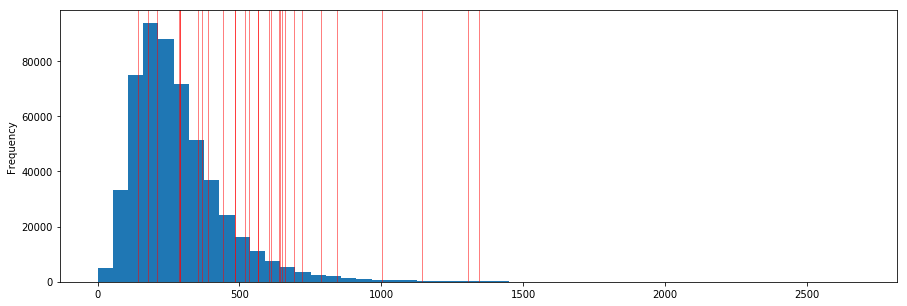

In [123]:
df2.groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'])['opp_momentum'].max().reset_index()['opp_momentum'].plot(kind='hist', bins=50, figsize=(15, 5))
inj_pair_opp_momentum = df2.loc[df2['injury_pair']].groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'])['opp_momentum'].max().reset_index()['opp_momentum'].tolist()
for value in inj_pair_opp_momentum:
    plt.axvline(x=value, color='red', linewidth=0.5)

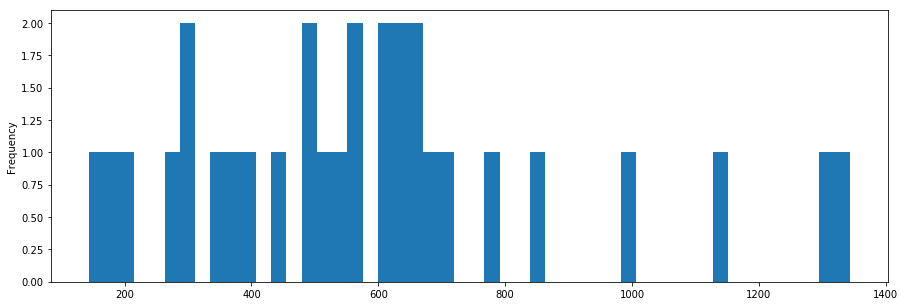

In [118]:
df2.loc[df2['injury_pair']].groupby(['Season_Year','GameKey','PlayID','gsisid','gsisid_partner'])['opp_momentum'].max().reset_index()['opp_momentum'].plot(kind='hist', bins=50, figsize=(15, 5))